![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [22]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [13]:
# Celda 1.1.1
print("Maximo de ciclas rentadas  por estacion: " + str(bikes.groupby('season').total.mean().max()))
print("Minimo de ciclas rentadas  por estacion: " + str(bikes.groupby('season').total.mean().min()))

Maximo de ciclas rentadas  por estacion: 234.417124039517
Minimo de ciclas rentadas  por estacion: 116.34326135517499


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [15]:
# Celda 1.2.1
print("Maximo de ciclas rentadas  por hora del dia: " + str(bikes.groupby('hour').total.mean().max()))
print("Minimo de ciclas rentadas  por hora del dia: " + str(bikes.groupby('hour').total.mean().min()))

Maximo de ciclas rentadas  por hora del dia: 468.765350877193
Minimo de ciclas rentadas  por hora del dia: 6.407239819004525


La variable "Season" corresponde  a las estaciones del año: 1:winter, 2:spring, 3:summer, 4:fall. Como se puede ver en la celda 1.1 lo que se obtiene es la cantidad de ciclas rentadas en promedio durante cada estacion del año, asi por ejemplo podemos decir que en Invierno se rentaron en promedio 116.3 ciclas. Se puede ver como en las estaciones mas calidas del año (2:spring, 3:summer) la cantidad de ciclas rentadas es mayor en comparacion a las otras epocas del año. En la celda 1.1.1 se puede constatar que la estacion en la que mas ciclas se rentan es en verano (234.417 ciclas rentadas), y en la que menos ciclas se rentan es invierno (116.34 ciclas rentadas).
La variable "hour" corresponde  a las horas del dia (Esta variable se obtiene de la variable (datime)): Como se puede ver en la celda 1.2 lo que se obtiene es la cantidad de ciclas rentadas en promedio durante cada hora del dia (desde las 0 horas hasta las 23 horas), asi por ejemplo podemos decir que a las 23 horas (11 PM) en promedio se rentan 89.5 ciclas. En la  celda 1.2.1 se puede ver que en la hora que mas ciclas arriendan es a las 17 (5 PM) (468.765 ciclas rentadas) de igual forma la hora en la que menos ciclas se rentan es a las 4 AM (6.4 ciclas rentadas)


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

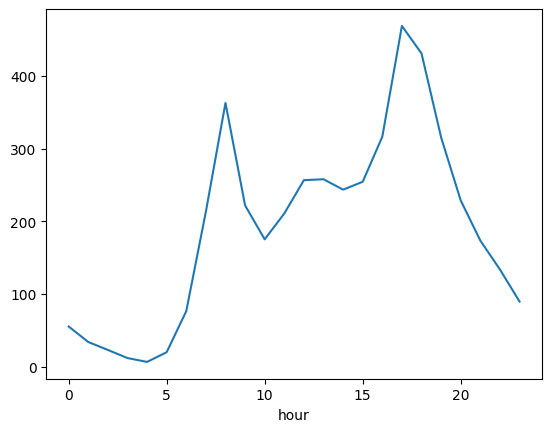

In [16]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

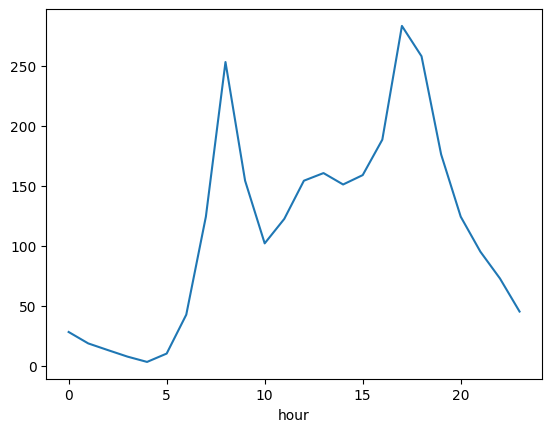

In [21]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_winter = bikes[bikes['season'] == 1]
bikes_winter.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

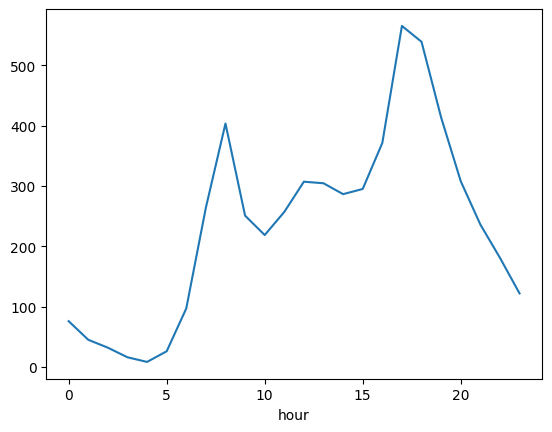

In [22]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_summer = bikes[bikes['season'] == 3]
bikes_summer.groupby('hour').total.mean().plot()


Se puede evidenciar que los patrones de uso de las ciclas es similar, en relacion a las horas del dia en que se usan.  En las tres graficas podemos ver una forma similar de la grafica, donde en las horas de la madrugada casi no se rentan ciclas, ya en la mañana hay un pico, que despues decae, y finalmente otro pico en la tarde para que finalmente disminuya el numero de ciclas rentadas.

Se evidencia que dependiendo de la estacion del año en la que se vea la grafica el numero de ciclas rentadas aumenta, por ejemplo se oberva que durante verano (Seasion = 3) se rentan mas ciclas que durante invierno (seasion = 1).

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [41]:
# Celda 3
# Definir las variables predictoras y la variable de respuesta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = bikes[['hour', 'season']]
y = bikes['total']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

# Ajustar el modelo de regresión lineal
model = LinearRegression().fit(XTrain, yTrain)

# Imprimir los coeficientes
print("Intercepto:", model.intercept_)
print("Coeficientes para las variables predictoras:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

y_pred = model.predict(XTest)

# Calcular la Raiz del  Error Cuadrático Medio (RMSE)
rmse_punto3 = np.sqrt(mean_squared_error(yTest, y_pred))

print("RMSE Regresion Lineal:", rmse_punto3)


Intercepto: -2.2398811285686406
Coeficientes para las variables predictoras:
hour: 10.579442932087048
season: 28.03619567950515
RMSE Regresion Lineal: 163.99884193885413


Podemos ver que el coeficiente de la variable horas es de 10.5 lo que indica que por cada cambio unitario en la variable hora , se incrementa en 10.5 las ciclas rentadas.
Podemos ver que el coeficiente de la variable season es de 28.03 lo que indica que cuando se produce un cambio de temporada (por ejemplo invierno a primavera) , se incrementa en 28.03 las ciclas rentadas.
Las limitaciones del modelo de regresion lienal aparecen al intentar predecir de forma correcta un patron de comportamiento que no se evidencia lineal, como se observan en las graficas anteriores, se pueden observar varios picos y valles para la renta de bicicletas, y un modelo de regresion lineal fallara en capturar estos comportamientos que sigen mas bien un patron de onda senoidal.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [27]:
# Celda 4
# Separación de variables predictoras (X) y variable de interes (y)
from sklearn.model_selection import train_test_split

XTotal = bikes[['hour', 'season']]
yTotal = bikes['total']


XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

# Función para calcular el error cuadrático medio (MSE)
def mse(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.mean((y - np.mean(y))**2)

# Función para calcular la impureza de la división basada en el MSE
def mse_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y[filter_l]
    y_r = y[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    mse_y = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)

    mse_impurity_ = mse_y - (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)

    return mse_impurity_


# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()   ###########################################################     y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=6, num_pct=10)

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Predicciones del árbol
y_pred_tree = tree_predict(XTest, tree)

# Calcular la Raiz del  Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mean_squared_error(yTest, y_pred_tree))

print("RMSE del árbol de decisión:", rmse)



RMSE del árbol de decisión: 116.76778699944624


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'RMSE')

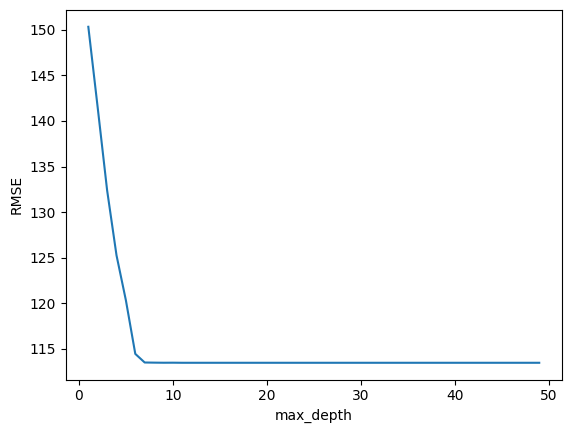

In [33]:
# CALIBRACION DE MODELO DE ARBOL DE DECISION - PARAMETRO max_depth
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


XTotal = bikes[['hour', 'season']]
yTotal = bikes['total']

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
max_depth_range = range(1, 50)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = cross_val_score(regressor, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error')
    rmse_scores.append(np.sqrt(-scores.mean()))

plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

Se observa que con una profundad de 9 se logra el mejor desempeño del RMSE. Se usa este parametro para calcular el modelo de arbol de decision.

In [38]:
# Celda 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


clf = DecisionTreeRegressor(max_depth=9, random_state=1)
clf.fit(XTrain, yTrain)

predictions = clf.predict(XTest)


rmse_punto5 = np.sqrt(mean_squared_error(yTest, predictions))

print("RMSE Arbol de decision:", rmse_punto5)


RMSE Arbol de decision: 115.69735621113367


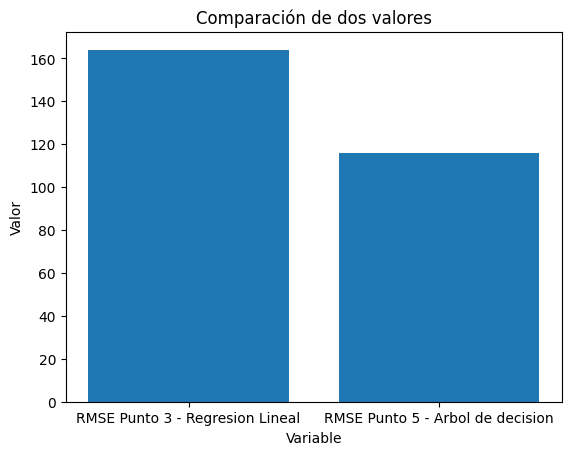

In [40]:
# Comparacion RMSE modelos punto 3 y punto  5
import matplotlib.pyplot as plt

etiquetas = ['RMSE Punto 3 - Regresion Lineal', 'RMSE Punto 5 - Arbol de decision']
plt.bar(etiquetas, [rmse_punto3, rmse_punto5])
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Comparación de dos valores')
plt.show()


Se calcula el RMSE de ambos modelos, regresion lineal y arboles de decision, lograndose un mejor desempeño en el modelo de Arboles de decision, con un valor de RMSE de  115.6 en comparacion al RMSE del modelo de regresion lineal que es de 163.9.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [46]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [47]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [48]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

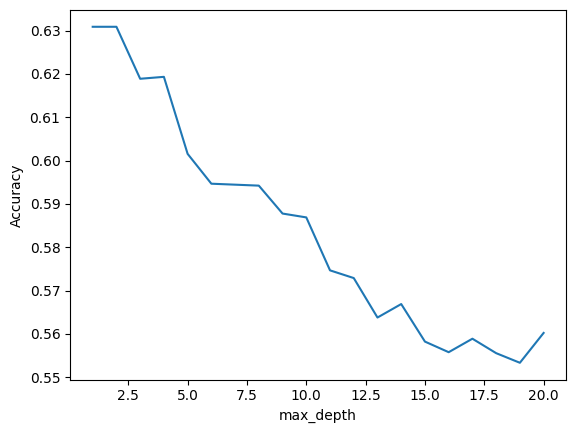

In [49]:
# Celda 6
# Calibracion de Max_Depth àra arbol de decision
max_depth_range = range(1, 21)
accuracy_scores = []
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

max_depth_optimo=sorted(zip(accuracy_scores, max_depth_range))[::-1][0][1]


In [50]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ARBOL DE DECISION
clf = DecisionTreeClassifier(max_depth=max_depth_optimo, random_state=1)
clf.fit(X_train, y_train)
# Realizar predicciones con el modelo de árbol de decisión
y_pred = clf.predict(X_test)

# Calcular las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Desempeño del modelo de Árbol de Decisión:")
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# REGRESION LOGISTICA
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de regresión logística
y_pred_logistic = logistic_model.predict(X_test)

# Calcular las métricas de desempeño
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print("Desempeño del modelo de Regresión Logística:")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_logistic)




Desempeño del modelo de Árbol de Decisión:
Accuracy: 0.6453333333333333
F1-Score: 0.6448598130841121
Desempeño del modelo de Regresión Logística:
Accuracy: 0.6146666666666667
F1-Score: 0.6110363391655451


Se puede evidenciar un mejor desempeño del modelo de regresion logistica con un Accuracy de 0.61 y un F1-Score de 0.611. Es decir que el modelo ha acertado el 61.46% de las predicciones en el conjunto de prueba.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [64]:
# Celda 7
######## MODELOS INDEPENDIENTES
print("ANALISIS INDEPENDIENTE DE MODELOS")

# árboles de decisión donde max_depth tome un valor de su elección = 8
from sklearn.ensemble import BaggingClassifier
bagreg1 = BaggingClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
bagreg1.fit(X_train, y_train)
y_pred = bagreg1.predict(X_test)
y_pred

accuracy1 = accuracy_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
print("Desempeño del modelo de Árbol de Decisión con max_depth 8:")
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# árboles de decisión donde min_samples_leaf tome un valor de su elección = 5
from sklearn.ensemble import BaggingClassifier
bagreg2 = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
bagreg2.fit(X_train, y_train)
y_pred = bagreg2.predict(X_test)
y_pred

accuracy2 = accuracy_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
print("Desempeño del modelo de Árbol de Decisión con max_depth 8:")
print("Accuracy:", accuracy)
print("F1-Score:", f1)


# regresiones logísticas
from sklearn.ensemble import BaggingClassifier
bagreg3 = BaggingClassifier(LogisticRegression(), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
bagreg3.fit(X_train, y_train)
y_pred = bagreg3.predict(X_test)
y_pred

accuracy3 = accuracy_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)
print("Desempeño del modelo de regresiones logísticas:")
print("Accuracy:", accuracy)
print("F1-Score:", f1)


ANALISIS INDEPENDIENTE DE MODELOS
Desempeño del modelo de Árbol de Decisión con max_depth 8:
Accuracy: 0.6573333333333333
F1-Score: 0.6586985391766268
Desempeño del modelo de Árbol de Decisión con max_depth 8:
Accuracy: 0.6573333333333333
F1-Score: 0.6586985391766268
Desempeño del modelo de regresiones logísticas:
Accuracy: 0.6573333333333333
F1-Score: 0.6586985391766268


In [66]:
######## ENSAMBLAJE DE MODELOS
from sklearn.ensemble import VotingClassifier

ensamblaje_votacion = VotingClassifier(estimators=[("clasificador1", bagreg1),("clasificador2", bagreg2), ("clasificador3", bagreg1)], voting="hard")
ensamblaje_votacion.fit(X_train, y_train)
y_pred_encamblaje_votacion = ensamblaje_votacion.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_encamblaje_votacion)
f1 = f1_score(y_test, y_pred_encamblaje_votacion)
print("Desempeño del modelo usando ensamblaje")
print("Accuracy:", accuracy)
print("F1-Score:", f1)

Desempeño del modelo usando ensamblaje
Accuracy: 0.6573333333333333
F1-Score: 0.6586985391766268


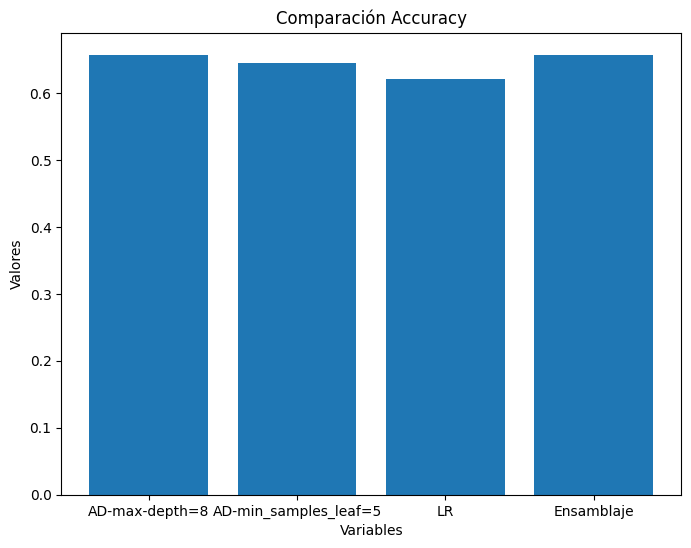

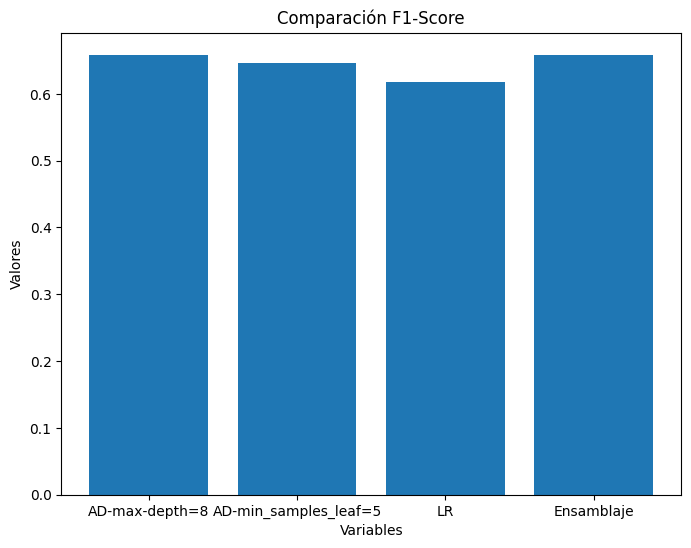

In [73]:
etiquetas = ['AD-max-depth=8', 'AD-min_samples_leaf=5', 'LR', 'Ensamblaje']
valores = [accuracy1, accuracy2, accuracy3, accuracy]
plt.figure(figsize=(8, 6))  
plt.bar(etiquetas, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Comparación Accuracy')
plt.show()

etiquetas = ['AD-max-depth=8', 'AD-min_samples_leaf=5', 'LR', 'Ensamblaje']
valores = [f11, f12, f13, f11]
plt.figure(figsize=(8, 6))  
plt.bar(etiquetas, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Comparación F1-Score')
plt.show()


Se observa que el ensamblaje de modelos tiene un desempeño similar al arbol de desicion con un maximo de profundiad de 8. Aunque el modelo de ensamblaje no tiene un mejor desempeño, se evidencia que tampoc se afecta el accuracy al mezclar los 3 modelos (dos de arboles de decision y uno de regresion lineal).  

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [81]:
# Celda 8
# Calculo de OOB para cad amodelo
oob__error1 = bagreg1.oob_score_
oob__error2 = bagreg2.oob_score_
oob__error3 = bagreg3.oob_score_

err = [oob__error1, oob__error2, oob__error3]

total_err =  sum(err)
pesos_alpha = [1-rate_error/total_err for rate_error in err]

sum_alphas = sum(pesos_alpha)
alpha_final = [ponderacion/sum_alphas for ponderacion in pesos_alpha]


In [83]:
######## ENSAMBLAJE DE MODELOS - con votacion ponderada


from sklearn.ensemble import VotingClassifier

ensamblaje_votacion = VotingClassifier(estimators=[("clasificador1", bagreg1),("clasificador2", bagreg2), ("clasificador3", bagreg1)], voting="soft", weights=alpha_final)
ensamblaje_votacion.fit(X_train, y_train)
y_pred_encamblaje_votacion = ensamblaje_votacion.predict(X_test)

accuracy_pond = accuracy_score(y_test, y_pred_encamblaje_votacion)
f1_pond = f1_score(y_test, y_pred_encamblaje_votacion)
print("Desempeño del modelo usando ensamblaje")
print("Accuracy:", accuracy)
print("F1-Score:", f1)

Desempeño del modelo usando ensamblaje
Accuracy: 0.6553333333333333
F1-Score: 0.656934306569343


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

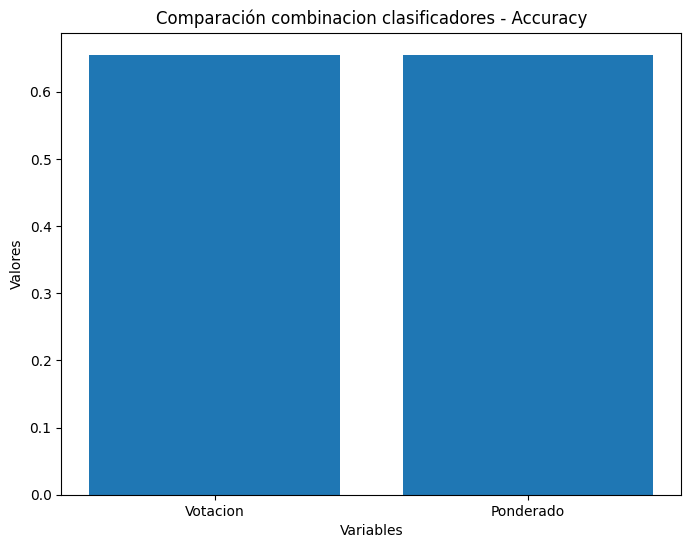

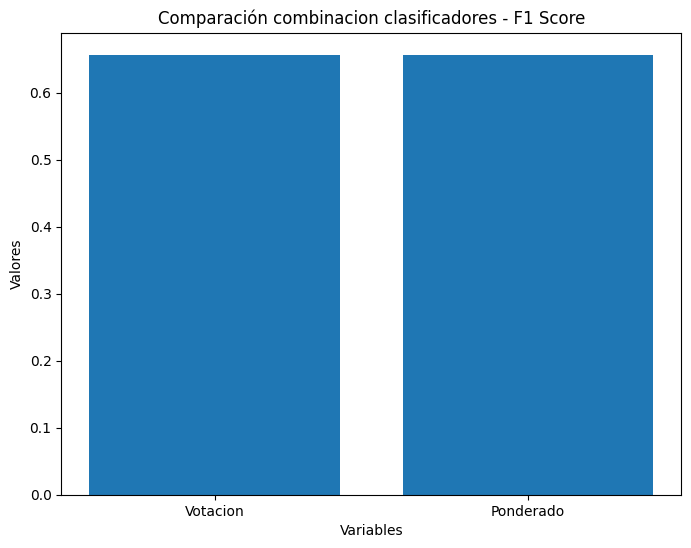

In [87]:
# Celda 9
etiquetas = ['Votacion', 'Ponderado']
valores = [accuracy, accuracy_pond]
plt.figure(figsize=(8, 6))  
plt.bar(etiquetas, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Comparación combinacion clasificadores - Accuracy')
plt.show()

etiquetas = ['Votacion', 'Ponderado']
valores = [f1, f1_pond]
plt.figure(figsize=(8, 6))  
plt.bar(etiquetas, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Comparación combinacion clasificadores - F1 Score')
plt.show()

Para estos modelos se puede observar un el ensmblaj con votacion pnderada (0.655) una ligera mejora en relacion al modelo de ensamblaje de votacion (0.6573). Anque no es significativa se demuestra una mejora en el desempeño del modelo. La ponderacion permite "castigar" el error de clasificacion de cada modelo, de tal forma que si un modelo no tiene un buen desempeño, s peso en la votacion se ve disminuiod por el parametro de ponderacion calculado, lo que permite dar mayor valor a modelos cuyo desempeño sea mejor. Sin embargo es importante reconocer que tipo de error estamos valorando, y que tipo de error es de mayor importancia segun mi contexto, pues aunque un modelo pueda que predizca mal, los casos que son relevantes para mi contexto, puede predecirlos bien, y asi la ponderacion disminuiria el impacto de este modelo en el perfomance general de mi modelo de combinacion de clasificadores.

Tanto el modelo de votacion como el modelo de votacion ponderada, permiten aprovechar las ventajas de cada modelo o clasificador que se use, logrando en algunos casos un desempeño superior.  